In [1522]:
import pandas as pd

file_csv_immo = 'immo_data.csv'

df_immo = pd.read_csv(file_csv_immo)

In [1523]:
file_csv_immo = 'immo_data.csv'

regional_data = 'INGRESOS_REGIONES.xlsx'
df_income_region = pd.read_excel(regional_data)
df_immo = pd.read_csv(file_csv_immo)

df = df_immo.merge(df_income_region, left_on='regio1', right_on='regions', how='left')

In [1524]:
df = df[df['date'].isin(['May19', 'Oct19'])]

In [1525]:
df = df.drop(columns=['serviceCharge', 'heatingType', 'telekomTvOffer', 'telekomHybridUploadSpeed', 'newlyConst', 'telekomUploadSpeed', 'noParkSpaces', 'firingTypes', 'yearConstructedRange', 'houseNumber', 'interiorQual', 'petsAllowed', 'street', 'streetPlain', 'thermalChar', 'noRoomsRange', 'livingSpaceRange', 'description', 'facilities', 'heatingCosts', 'numberOfFloors', 'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'geo_krs', 'geo_bln'])

In [1526]:
for x in df.columns:
    print(f"The percentage of empty cells in column {x} is {round(df[x].isna().sum()/len(df[x])*100,2)} %.")

The percentage of empty cells in column regio1 is 0.0 %.
The percentage of empty cells in column balcony is 0.0 %.
The percentage of empty cells in column picturecount is 0.0 %.
The percentage of empty cells in column pricetrend is 0.68 %.
The percentage of empty cells in column totalRent is 14.98 %.
The percentage of empty cells in column yearConstructed is 20.99 %.
The percentage of empty cells in column scoutId is 0.0 %.
The percentage of empty cells in column hasKitchen is 0.0 %.
The percentage of empty cells in column cellar is 0.0 %.
The percentage of empty cells in column baseRent is 0.0 %.
The percentage of empty cells in column livingSpace is 0.0 %.
The percentage of empty cells in column condition is 25.39 %.
The percentage of empty cells in column lift is 0.0 %.
The percentage of empty cells in column baseRentRange is 0.0 %.
The percentage of empty cells in column typeOfFlat is 13.16 %.
The percentage of empty cells in column geo_plz is 0.0 %.
The percentage of empty cells i

In [1527]:
duplicates = df.duplicated()

print(df[duplicates])

Empty DataFrame
Columns: [regio1, balcony, picturecount, pricetrend, totalRent, yearConstructed, scoutId, hasKitchen, cellar, baseRent, livingSpace, condition, lift, baseRentRange, typeOfFlat, geo_plz, noRooms, floor, garden, regio2, regio3, date, regions, BS_Insgesamt, BS_Männer, BS_Frauen, BF_Insgesamt, BF_Männer, BF_Frauen, GS_Insgesamt, GS_Männer, GS_Frauen]
Index: []

[0 rows x 32 columns]


In [1528]:
df.drop('regions', axis=1, inplace=True)

In [1529]:
df = df[df['livingSpace'] <= 500]

In [1530]:
df = df[df['livingSpace'] >= 20]

In [1531]:
df['yearConstructed'] = df['yearConstructed'].apply(lambda x: f"{x:.0f}" if x.is_integer() else x)

In [1532]:
condition_mapping = {'well_kept': 'pre-owned', 'refurbished': 'mint_condition', 'fully_renovated':'mint_condition', 'first_time_use':'mint_condition', 'mint_condition':'mint_condition', 'modernized':'mint_condition', 'first_time_use_after_refurbishment':'mint_condition', 'negotiable':'pre-owned', 'need_of_renovation':'need_of_renovation', 'ripe_for_demolition':'need_of_renovation'}
df['condition'] = df['condition'].map(condition_mapping)

In [1533]:
# Define a function to categorize noRooms values
def bucket_rooms(x):
    if x < 2:
        return '1 Room/Studio'
    elif x < 3:
        return '2 Rooms'
    elif x < 4:
        return '3 Rooms'
    elif x < 5:
        return '4 Rooms'
    elif x <= 10:
        return '5-10 Rooms'
    elif x <= 20:
        return '11-20 Rooms'
    elif x <= 50:
        return '21-50 Rooms'
    else:
        return '51+ Rooms'

df['Room Category'] = df['noRooms'].apply(bucket_rooms)

In [1534]:
columns_names = df.columns
print(columns_names)

Index(['regio1', 'balcony', 'picturecount', 'pricetrend', 'totalRent',
       'yearConstructed', 'scoutId', 'hasKitchen', 'cellar', 'baseRent',
       'livingSpace', 'condition', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'floor', 'garden', 'regio2', 'regio3', 'date',
       'BS_Insgesamt', 'BS_Männer', 'BS_Frauen', 'BF_Insgesamt', 'BF_Männer',
       'BF_Frauen', 'GS_Insgesamt', 'GS_Männer', 'GS_Frauen', 'Room Category'],
      dtype='object')


In [1535]:
df = df[df['baseRent'] != 0]
df = df[df['livingSpace'] != 0]

In [1536]:
df.dtypes

regio1              object
balcony               bool
picturecount         int64
pricetrend         float64
totalRent          float64
yearConstructed     object
scoutId              int64
hasKitchen            bool
cellar                bool
baseRent           float64
livingSpace        float64
condition           object
lift                  bool
baseRentRange        int64
typeOfFlat          object
geo_plz              int64
noRooms            float64
floor              float64
garden                bool
regio2              object
regio3              object
date                object
BS_Insgesamt       float64
BS_Männer          float64
BS_Frauen          float64
BF_Insgesamt       float64
BF_Männer          float64
BF_Frauen          float64
GS_Insgesamt       float64
GS_Männer          float64
GS_Frauen          float64
Room Category       object
dtype: object

In [1537]:
df['price_m2'] = df['baseRent'] / df['livingSpace']

In [1538]:
df['price_m2_BS_Insgesamt'] = df['price_m2'] / df['BS_Insgesamt']

In [1539]:
df.groupby(['regio1'])['price_m2'].agg(['mean','max','min','median'])

,mean,max,min,median
regio1,,,,
Baden_Württemberg,11.774576,62.500000,1.575000,10.555556
Bayern,13.132928,59.375000,0.029412,11.021681
Berlin,13.875257,67.600000,5.223881,12.992041
Brandenburg,7.195095,134.000000,0.045018,6.162658
Bremen,8.299986,22.666667,2.941176,7.972973
Hamburg,13.933228,50.707490,4.349180,13.300000
Hessen,12.092400,53.225806,0.018182,10.875000
Mecklenburg_Vorpommern,6.546507,25.142857,2.000000,5.917199
Niedersachsen,7.818277,102.448770,0.228898,7.437872


In [1540]:
bins = range(0, int(df['livingSpace'].max()) + 20, 20)

df['rango_m2'] = pd.cut(df['livingSpace'], bins=bins)

count_ranges = df['rango_m2'].value_counts().sort_index()

print(count_ranges)

rango_m2
(0, 20]         310
(20, 40]      12613
(40, 60]      39349
(60, 80]      45033
(80, 100]     23106
(100, 120]    10965
(120, 140]     5376
(140, 160]     2475
(160, 180]     1146
(180, 200]      581
(200, 220]      321
(220, 240]      181
(240, 260]      108
(260, 280]       60
(280, 300]       43
(300, 320]       25
(320, 340]       14
(340, 360]        7
(360, 380]        8
(380, 400]        3
(400, 420]        5
(420, 440]        4
(440, 460]        6
(460, 480]        3
Name: count, dtype: int64


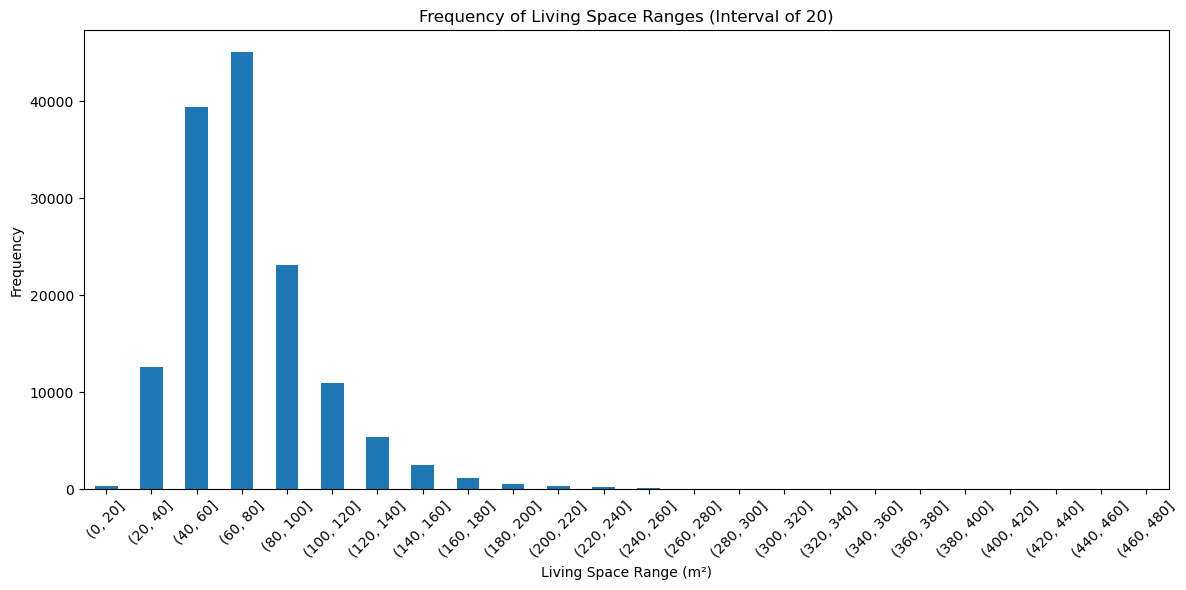

In [1541]:
import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(12, 6))
count_ranges.plot(kind='bar')

# Add labels and title
plt.xlabel('Living Space Range (m²)')
plt.ylabel('Frequency')
plt.title('Frequency of Living Space Ranges (Interval of 20)')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [1542]:
df = df.dropna(subset=['livingSpace'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = float(df['livingSpace'].quantile(0.25))
Q3 = float(df['livingSpace'].quantile(0.75))

# Calculate the IQR
IQR = Q3 - Q1

# Determine the outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

# Identify the outliers
outliers = values[(values < lower_bound) | (values > upper_bound)]

print("Outliers in 'square_meters':")
print(outliers)

6.121249999999989
135.35125
Outliers in 'square_meters':
20        160.00
22        140.00
115       136.00
135       170.00
182       148.00
           ...  
268542    161.00
268548    148.84
268594    140.00
268644    171.81
268714    155.00
Name: livingSpace, Length: 6094, dtype: float64


In [1543]:
df = df[df['livingSpace'] >= lower_bound]
df = df[df['livingSpace'] <= upper_bound]

In [1544]:
values_m2 = df['price_m2'].dropna()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_m2 = values_m2.quantile(0.25)
Q3_m2 = values_m2.quantile(0.75)

# Calculate the IQR
IQR_m2 = Q3_m2 - Q1_m2

# Determine the outlier limits
lower_bound_m2 = Q1_m2 - 1.5 * IQR_m2
upper_bound_m2 = Q3_m2 + 1.5 * IQR_m2

print(lower_bound_m2)
print(upper_bound_m2)

# Identify the outliers
outliers_m2 = values_m2[(values_m2 < lower_bound_m2) | (values_m2 > upper_bound_m2)]

print("Outliers in 'price_m2':")
print(outliers_m2)

-1.010533245556286
16.606319947333773
Outliers in 'price_m2':
21        41.034483
23        22.839506
28        39.344262
34        26.714286
46        22.812500
            ...    
268586    19.247312
268623    22.857143
268669    16.666667
268752    41.612903
268818    17.070563
Name: price_m2, Length: 6889, dtype: float64


In [1545]:
df = df[df['price_m2'] > 4]
df = df[df['price_m2'] <= upper_bound_m2]

In [1546]:
bins_m2 = range(0, int(df['price_m2'].max()) + 4, 4)

df['price_m2'] = pd.cut(df['price_m2'], bins=bins_m2)

count_ranges_m2 = df['price_m2'].value_counts().sort_index()

In [1547]:
df.shape

(126724, 35)

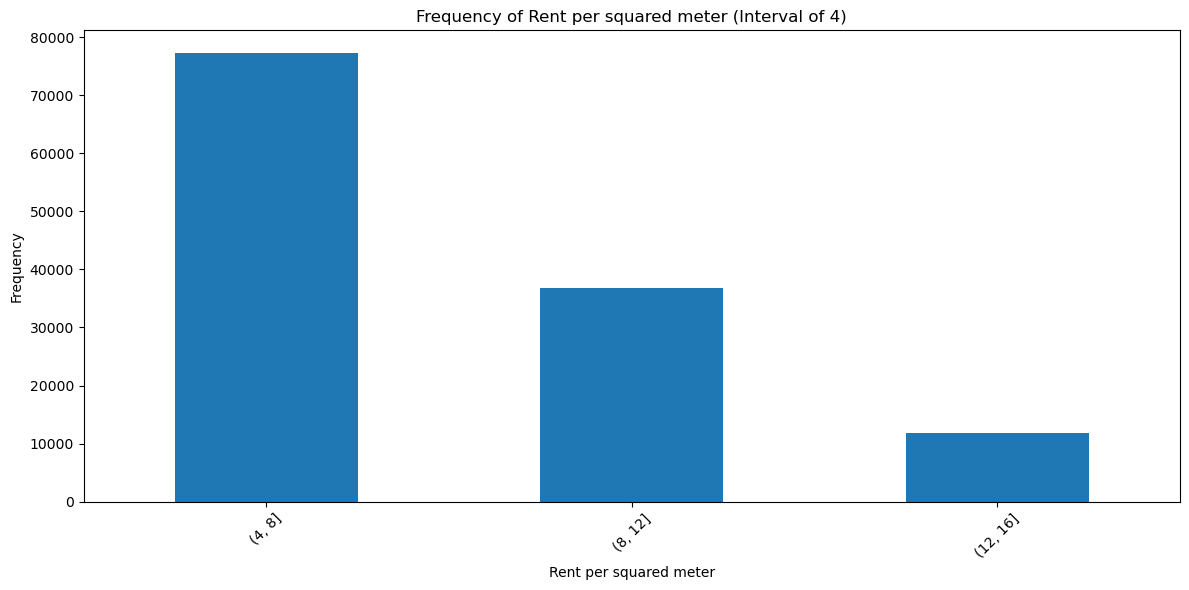

In [1548]:
count_ranges_m2_filtered = count_ranges_m2[count_ranges_m2 > 4]

# Create the bar plot
plt.figure(figsize=(12, 6))
count_ranges_m2_filtered.plot(kind='bar')

# Add labels and title
plt.xlabel('Rent per squared meter')
plt.ylabel('Frequency')
plt.title('Frequency of Rent per squared meter (Interval of 4)')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [1549]:
df.groupby(['regio1'])['livingSpace'].agg(['mean','max','min','median'])

,mean,max,min,median
regio1,,,,
Baden_Württemberg,80.578038,135.32,20.00,80.665
Bayern,77.092608,135.00,20.00,76.650
Berlin,72.706647,135.00,20.00,70.000
Brandenburg,66.610857,135.00,20.00,62.150
Bremen,69.656604,135.00,21.45,66.875
Hamburg,76.617070,135.00,20.52,74.270
Hessen,78.978621,135.00,20.00,78.640
Mecklenburg_Vorpommern,61.879935,134.89,20.00,60.000
Niedersachsen,73.018716,135.00,20.00,71.500


In [1550]:
df.groupby(['regio1'])['baseRent'].agg(['mean','max','min','median'])

,mean,max,min,median
regio1,,,,
Baden_Württemberg,831.687774,2125.00,150.00,799.500
Bayern,779.927402,2104.00,120.20,750.000
Berlin,842.013200,2128.00,182.78,750.000
Brandenburg,481.032941,1790.00,129.00,387.240
Bremen,575.980988,1890.00,170.00,490.070
Hamburg,944.228201,2200.00,161.08,890.000
Hessen,814.105655,2200.00,100.00,750.000
Mecklenburg_Vorpommern,414.403980,1595.00,103.00,347.440
Niedersachsen,567.649576,1800.00,108.50,513.175


In [1551]:
df.groupby(['regio1'])['price_m2_BS_Insgesamt'].agg(['mean','max','min','median'])

,mean,max,min,median
regio1,,,,
Baden_Württemberg,0.002211,0.003515,0.000863,0.002141
Bayern,0.002186,0.003529,0.000856,0.002128
Berlin,0.002575,0.003728,0.001173,0.002555
Brandenburg,0.002000,0.004680,0.001132,0.001726
Bremen,0.001844,0.003720,0.000902,0.001772
Hamburg,0.002446,0.003316,0.000870,0.002473
Hessen,0.002107,0.003376,0.000820,0.002071
Mecklenburg_Vorpommern,0.001997,0.004637,0.001205,0.001807
Niedersachsen,0.001874,0.003994,0.000963,0.001795


In [1552]:
df.groupby(['regio1'])['price_m2'].agg(['mean','max','min','median'])

TypeError: category dtype does not support aggregation 'mean'